**Feature Forge: Enhancing & Evaluating ML Models - Loan Prediction using Analytics Vidhya dataset**

**Introduction:**

This project is the fourth project of the bda74 Data Analytics and AI Bootcamp by Takeo. CSV dataset was obtained from Analytics Vidhya website which was aimed at implement feature engineering techniques and evaluating a machine learning model. The goal is to extract and select features, apply evaluation metrics, and refine the models to improve performance.

**Problem Statement:**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Objectives:**

1. Explore the dataset, preprocess and clean it.
2. Create visualizations for univariate and bivariate analysis.
3. Apply feature engineering methods to choose relevant features.
4. Train and implement a logistic regression model to predict the loan approval status.
5. Use K-Fold cross validation.
6. Use appropriate model evaluation metrics to evaluate the model.
7. Document the process and results.

**Methodology:**

1. **Tools used:**
   
   a. Python programming language
   
   b. Pandas for data manipulation and exploration

   c. Matplotlib and seaborn to visualize data and plot visualizations

   d. Scikitlearn to build model, perform model evaluation using metrics and preprocess using scaler.
   
2. **Data collection, cleaning and preprocessing:**

   a. Dataset was collected from Analytics Vidhya website. Only the train set was downloaded as it is planned to split the train test.

   b. Panda and numpy was used to inspect, manipulate and clean the data.

   c. Matplotlib and seaborn was used to visualize the data to see relevant relationships between features and target variable.

3. **Feature engineering:**

   a. Categorical features were encoded using one hot encoding and changed to numeric value for model use.

   b. Feature selection was done based on EDA and filter method, by only selecting a portion of the available features. Feature transformation was done by    creating relevant new features from raw features.

   
4.**Modeling and Evaluation:**

   a. Logistic Regression was used because the target variable is binary and also because of my beginner level. Sample Toy Dataset for Diabetes Prediction was used as the reference to apply similar algorithms.

   b. K-fold cross validation was done.

   c. Classification report of the final model was generated with precision,recall, f-1 score and accuracy.


**Results**

1. Loan prediction dataset from analyticsvidhya was collected, cleaned and used for model development after feature engineering.
2. K-fold cross validation results: Accuracy 86% , Precision 0.84 , Recall 1.00 , F-1 Score 0.91
3. Model evaluation metric: 79 percent accuracy.

**Challenges and Solutions**

1. The dataset was a mix of categorical and numerical values. It was solved by doing one hot encoding of the categorical values using this documentation: https://pbpython.com/categorical-encoding.html
2. Difficulty plotting categorical values in seaborn which was solved by using this documentation: https://seaborn.pydata.org/tutorial/categorical.html
3. Null values in the dataset within various features. Numerical values were filled using median as the data was not normally distributed and categorical values were filled with mode.
4. Convergence warnings and iteration limits being reached which was solved by using StandardScaler referring to this documentation: https://scikit-learn.org/stable/modules/preprocessing.html

**Conclusion:**

This project ws done as a part of learning to build and evaluate a logistic regression model to predict loan approval chances using the Analytics Vidhya Loan Prediction dataset.

The dataset was evaluated, visualized and feature engineering was done to extract relevant features and use them in the model to be built. 

K-fold cross validation was done with an accuracy of 86 percent.

The model was tested on unseen test set which was split in the beginning and obtained accuracy of 79 percent.

This was a good learning experience with a mixed and imbalanced dataset with different types of variables. Using standardscaler was another learning experience. The only downside was not balancing the dataset during logistic regression which would probably have improved the recall of rejections of the model. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")

print(data.shape)

(614, 13)


**The dataset has 614 columns and 13 rows.**

In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Target variable Loan_status is yes or no.**

**There are categorical features and numerical features**

**Categorical features are: Gender, Married, Education(ordinal), Self_Employed, Credit_History(1 and 0 ie Yes or no), Dependents(ordinal) and Property_Area(ordinal)**

**Numerical features are: ApplicantIncome, CoaplicantIncome, LoanAmount, Loan_Amount_Term**

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**So multiple features have null values.**

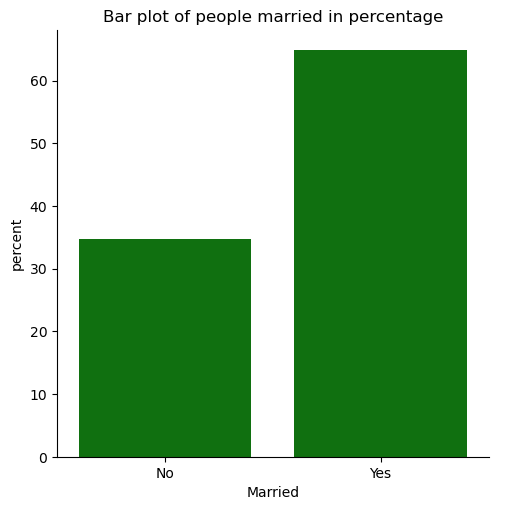

In [7]:
sns.catplot(data=data, x ="Married", kind = "count" , stat = "percent", color = "green")
plt.title("Bar plot of people married in percentage")
plt.show()

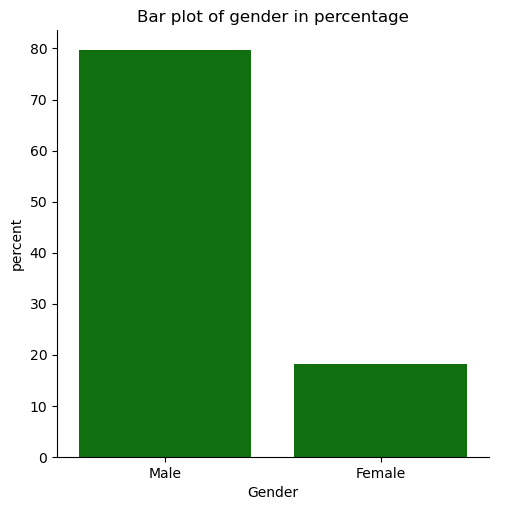

In [8]:
sns.catplot(data=data, x ="Gender", kind = "count" , stat = "percent", color = "green")
plt.title("Bar plot of gender in percentage")
plt.show()

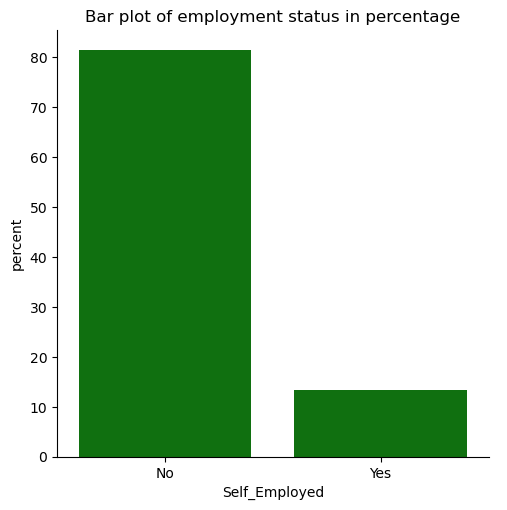

In [9]:
sns.catplot(data=data, x ="Self_Employed", kind = "count" , stat = "percent", color = "green")
plt.title("Bar plot of employment status in percentage")
plt.show()

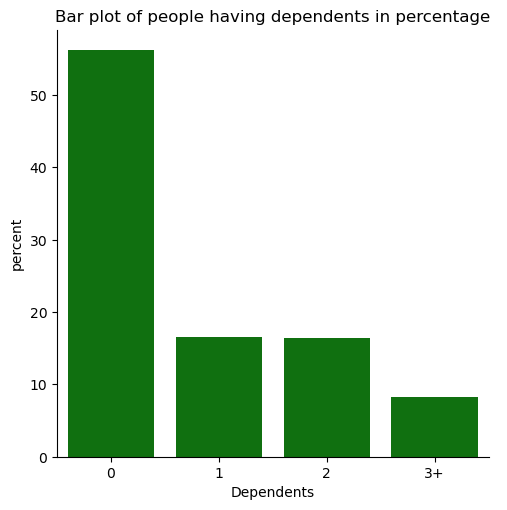

In [10]:
sns.catplot(data=data, x ="Dependents", kind = "count" , stat = "percent", color = "green")
plt.title("Bar plot of people having dependents in percentage")
plt.show()

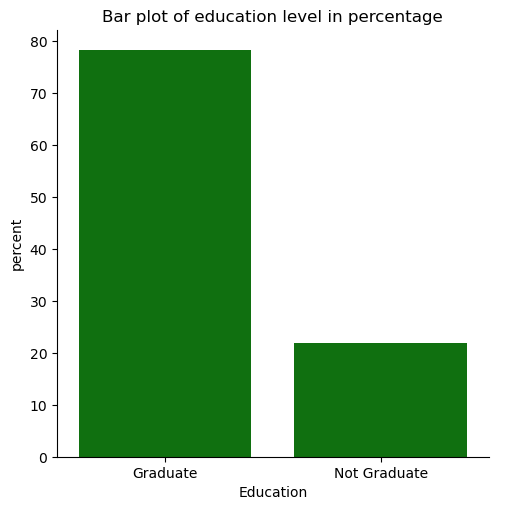

In [11]:
sns.catplot(data=data, x ="Education", kind = "count" , stat = "percent", color = "green")
plt.title("Bar plot of education level in percentage")
plt.show()

**We can see that:
80 percent are male, 20 percent are self employed, almost 65 percent are married, more than 50 percent have no dependents and 80 percent have graduate level education.**

**Lets see the income of the people using histogram with seaborn.**

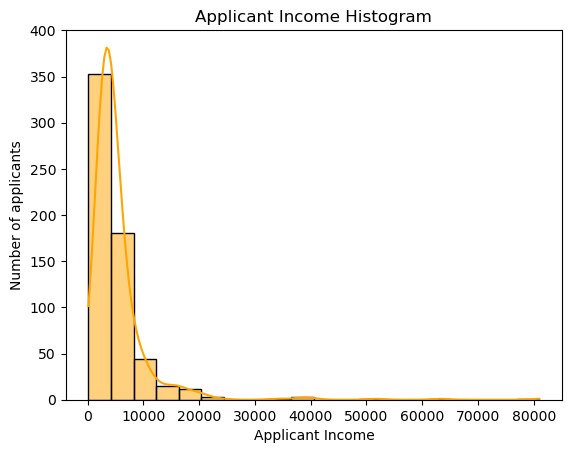

In [12]:
sns.histplot(x = "ApplicantIncome", bins = 20, kde = True, color="orange", data = data)
plt.title("Applicant Income Histogram")
plt.xlabel("Applicant Income")
plt.ylabel("Number of applicants")
plt.show()

**The data is not normally distributed in applicant income. There must be outliers. Let's plot box plot to see the outliers.**

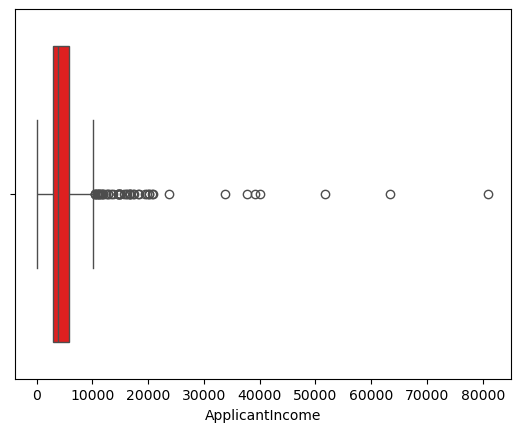

In [13]:
sns.boxplot(data=data, x = "ApplicantIncome" , color = "red")
plt.show()

**This shows severe outliers. Most income is below 10000 but some people have 50000 and more even upto 80000.**

**Lets do a histogram for loan amount to see its distribution**

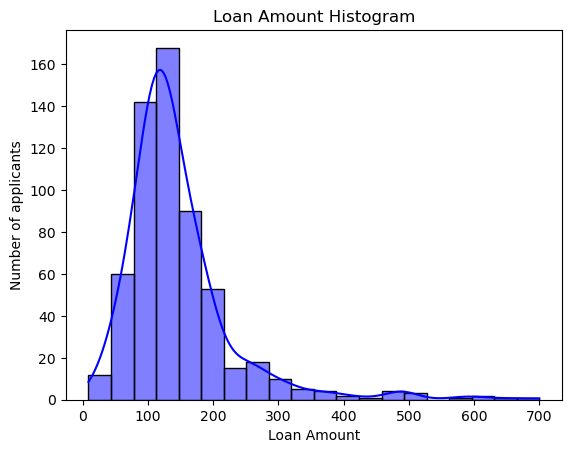

In [14]:
sns.histplot(x = "LoanAmount", bins = 20, kde = True, color="blue", data = data)
plt.title("Loan Amount Histogram")
plt.xlabel("Loan Amount")
plt.ylabel("Number of applicants")
plt.show()

**Loan amount also looks like it has some outliers but not as bad as the applicant income.**

**Lets see the outliers in loan amount.**

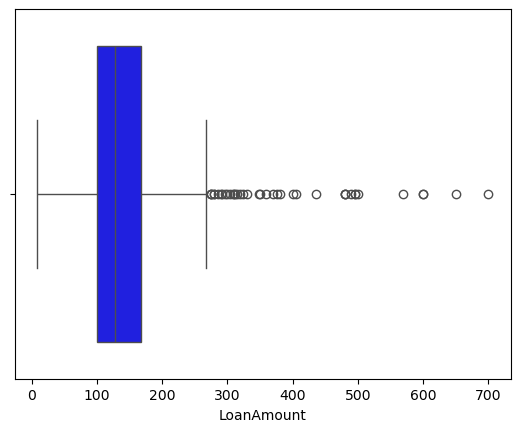

In [15]:
sns.boxplot(data=data, x = "LoanAmount" , color = "blue")
plt.show()

**There are a lot of outliers but most of the loan amount is between 100000 and 200000.**

**Lets see loan status by marital status.**

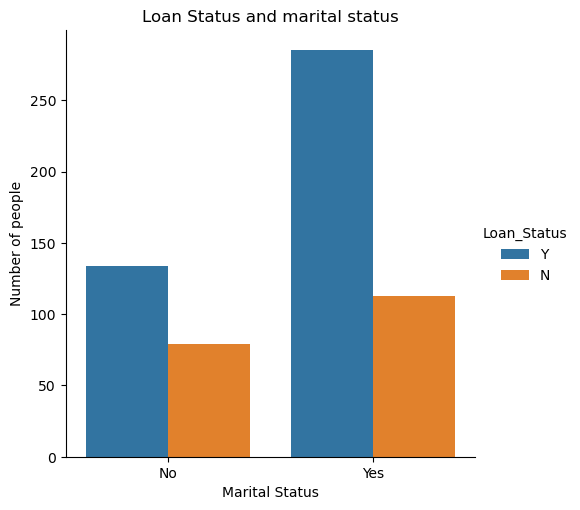

In [16]:
sns.catplot(data=data, x="Married", hue="Loan_Status", kind = "count")
plt.title("Loan Status and marital status")
plt.xlabel("Marital Status")
plt.ylabel("Number of people")
plt.show()

**It looks like more married applicants were approved. But since the dataset clearly has 65 percent married applicants as we saw above, based on the number of people who are not married and still got approved, it doesn't look like marital status has much effect on the loan approval chances.**

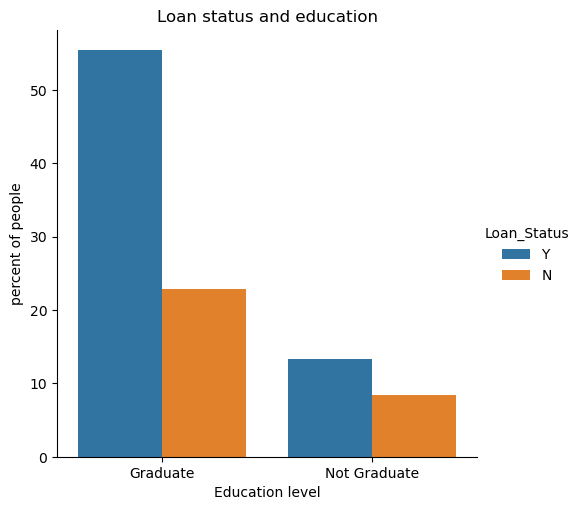

In [17]:
sns.catplot(data=data, x="Education", hue="Loan_Status", stat = "percent", kind = "count")
plt.title("Loan status and education")
plt.xlabel("Education level")
plt.ylabel("percent of people")
plt.show()

**I did this analysis between education and loan approval in percentage to see if I can more clearly visualize if education has any effect on loan status.**

**But just like marital status, it just looks like the graduate number of approval looks more because there are 80 percent graduates.**

**However I also see that the number of non graduates with rejection is relatively more compared to the number of graduates with rejection when I visualize the grouped bar plot.**

**Lastly, lets see if coapplicant income has any affect on the loan status.** 

**First, let's create a histogram.**

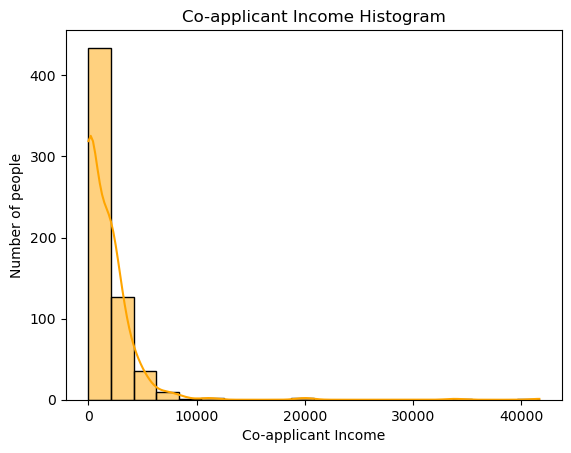

In [18]:
sns.histplot(x = "CoapplicantIncome", bins = 20, kde = True, color="orange", data = data)
plt.title("Co-applicant Income Histogram")
plt.xlabel("Co-applicant Income")
plt.ylabel("Number of people")
plt.show()

**Looks like there are not many co-applicants with some form of income. Lets see if this has any affect on loan status.**

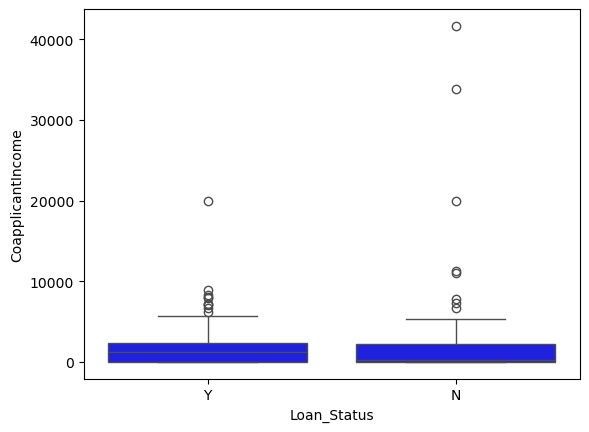

In [19]:
sns.boxplot(data=data, x = "Loan_Status" , y = "CoapplicantIncome",  color = "blue")
plt.show()

**Infact many co-applicants with high income still got rejected. It doesn't look like co-applicant income by itself will be able to predict if loan will be approved or not.**.

**DATA CLEANING**

**Filling null values**

For categorical features, the best way to fill missing value is using mode, which is the most repeated value.

For numerical features, the best way to fill missing value is using mean or median. Mean is only good if the data is normally distributed. 

We have already seen from above EDA that numerical features like loanamount and applicantincome have outliers and is not normally distributed. So I will stick with median for these.

**Lets check for null values again**

In [20]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [22]:
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())

**FEATURE ENGINEERING**

**One hot encoding of categorical features**

In [23]:
categorical_features = ["Married", "Gender", "Education", "Self_Employed", "Property_Area"]
data = pd.get_dummies(data, columns = categorical_features, drop_first = True)

In [24]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,False,True,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,False,True,False,False,False,True


In [25]:
encoded_cat_features = ["Married_Yes", "Gender_Male", "Education_Not Graduate", "Self_Employed_Yes", "Property_Area_Semiurban", "Property_Area_Urban"]

**These new features which have been one hot encoded have yes and no, so I am changing them to 1 and 0 to use in model because logistic regression will need numeric input** 

In [26]:
data[encoded_cat_features] = data[encoded_cat_features].astype(int)

In [27]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,0,0,0,1


**I will be dropping Loan_Status later to assign it to y as it is the target variable but I am converting it to 1 and 0 for the model.**

In [28]:
data["Loan_Status"] = data["Loan_Status"].astype(str).map({"Y":1, "N":0})

In [29]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1


**Now that all the categorical columns are numerical, next plan is to use domain information and my visualization from EDA and some internet research to see what is actually relevant for prediction.**

**My plan: I will use the filter method. Feature selection by dropping irrelevant and redundant columns and feature transformation by creating new columns. Even though some features like Applicant income and Co applicant income stand on their own, I will be combining them into Total income. I will also do feature transformation by creating Estimated Monthly Payment (EMI) based on the domain information that people will less EMI are more likely to not be loan defaulters and so may get approved.** 

Total income = Applicant income + Coaaplicant income

EMI = Loan amount/Loan Amount term

**I will drop the following columns:**

1. Loan_id as it is redundant
2. Coapplicant income as I have already made Total Income
3. Dependents column as it doesn't have much effect and has value like 3+

The goal is to reduce complexity in building the model and improving model performance. 

In [30]:
data["Total_income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [31]:
data["EMI"] = data ["LoanAmount"] / data["Loan_Amount_Term"]

In [32]:
data.drop(["Loan_ID", "CoapplicantIncome" , "Dependents"], axis = 1, inplace = True)

In [33]:
data.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_income,EMI
0,5849,128.0,360.0,1.0,1,0,1,0,0,0,1,5849.0,0.355556
1,4583,128.0,360.0,1.0,0,1,1,0,0,0,0,6091.0,0.355556
2,3000,66.0,360.0,1.0,1,1,1,0,1,0,1,3000.0,0.183333
3,2583,120.0,360.0,1.0,1,1,1,1,0,0,1,4941.0,0.333333
4,6000,141.0,360.0,1.0,1,0,1,0,0,0,1,6000.0,0.391667


**MODEL SELECTION and MODEL CREATION**

**I will be using Logistic Regression only as a beginning project and because the target variable is a yes or no, binary target. Based on the Sample Toy Dataset for Diabetes Prediction, I will try to apply similar algorithm to create this model.**

In [34]:
#creating separate dataset for target variable
X = data.drop(columns = ["Loan_Status"])
y = data["Loan_Status"]

In [35]:
#splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
#K-fold Cross Validation(5 folds)
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
accuracies = []
precisions = []
recalls = []
f1_scores = []

In [37]:
#K-fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

In [38]:
numerical_columns_scale = ["ApplicantIncome", "LoanAmount", "Loan_Amount_Term", "Total_income", "EMI"]
#scaling
scaler = StandardScaler()
X_train_fold[numerical_columns_scale] = scaler.fit_transform(X_train_fold[numerical_columns_scale])
X_val_fold[numerical_columns_scale] = scaler.transform(X_val_fold[numerical_columns_scale])

C:\Users\suyas\AppData\Local\Temp\ipykernel_5820\846816955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[numerical_columns_scale] = scaler.fit_transform(X_train_fold[numerical_columns_scale])
C:\Users\suyas\AppData\Local\Temp\ipykernel_5820\846816955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_fold[numerical_columns_scale] = scaler.transform(X_val_fold[numerical_columns_scale])


In [39]:
#model : Logistic Regression
model = LogisticRegression(max_iter=1000)

In [40]:
#train the model
model.fit(X_train_fold, y_train_fold)
y_pred = model.predict(X_val_fold)

In [41]:
#metrics
accuracies.append(accuracy_score(y_val_fold, y_pred))
precisions.append(precision_score(y_val_fold, y_pred))
recalls.append(recall_score(y_val_fold, y_pred))
f1_scores.append(f1_score(y_val_fold, y_pred))

In [42]:
#Average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f}")

Average Accuracy: 0.86
Average Precision: 0.84
Average Recall: 1.00
Average F1 Score: 0.91


**Test set**

In [46]:
last_model = LogisticRegression(max_iter=1000)
last_model.fit(X_train, y_train)

C:\Users\suyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [47]:
y_test_pred = last_model.predict(X_test)

In [48]:
print("Classification report:")
print(classification_report(y_test, y_test_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

